<a href="https://colab.research.google.com/github/Karasiari/Graphs/blob/main/PhyzteX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx

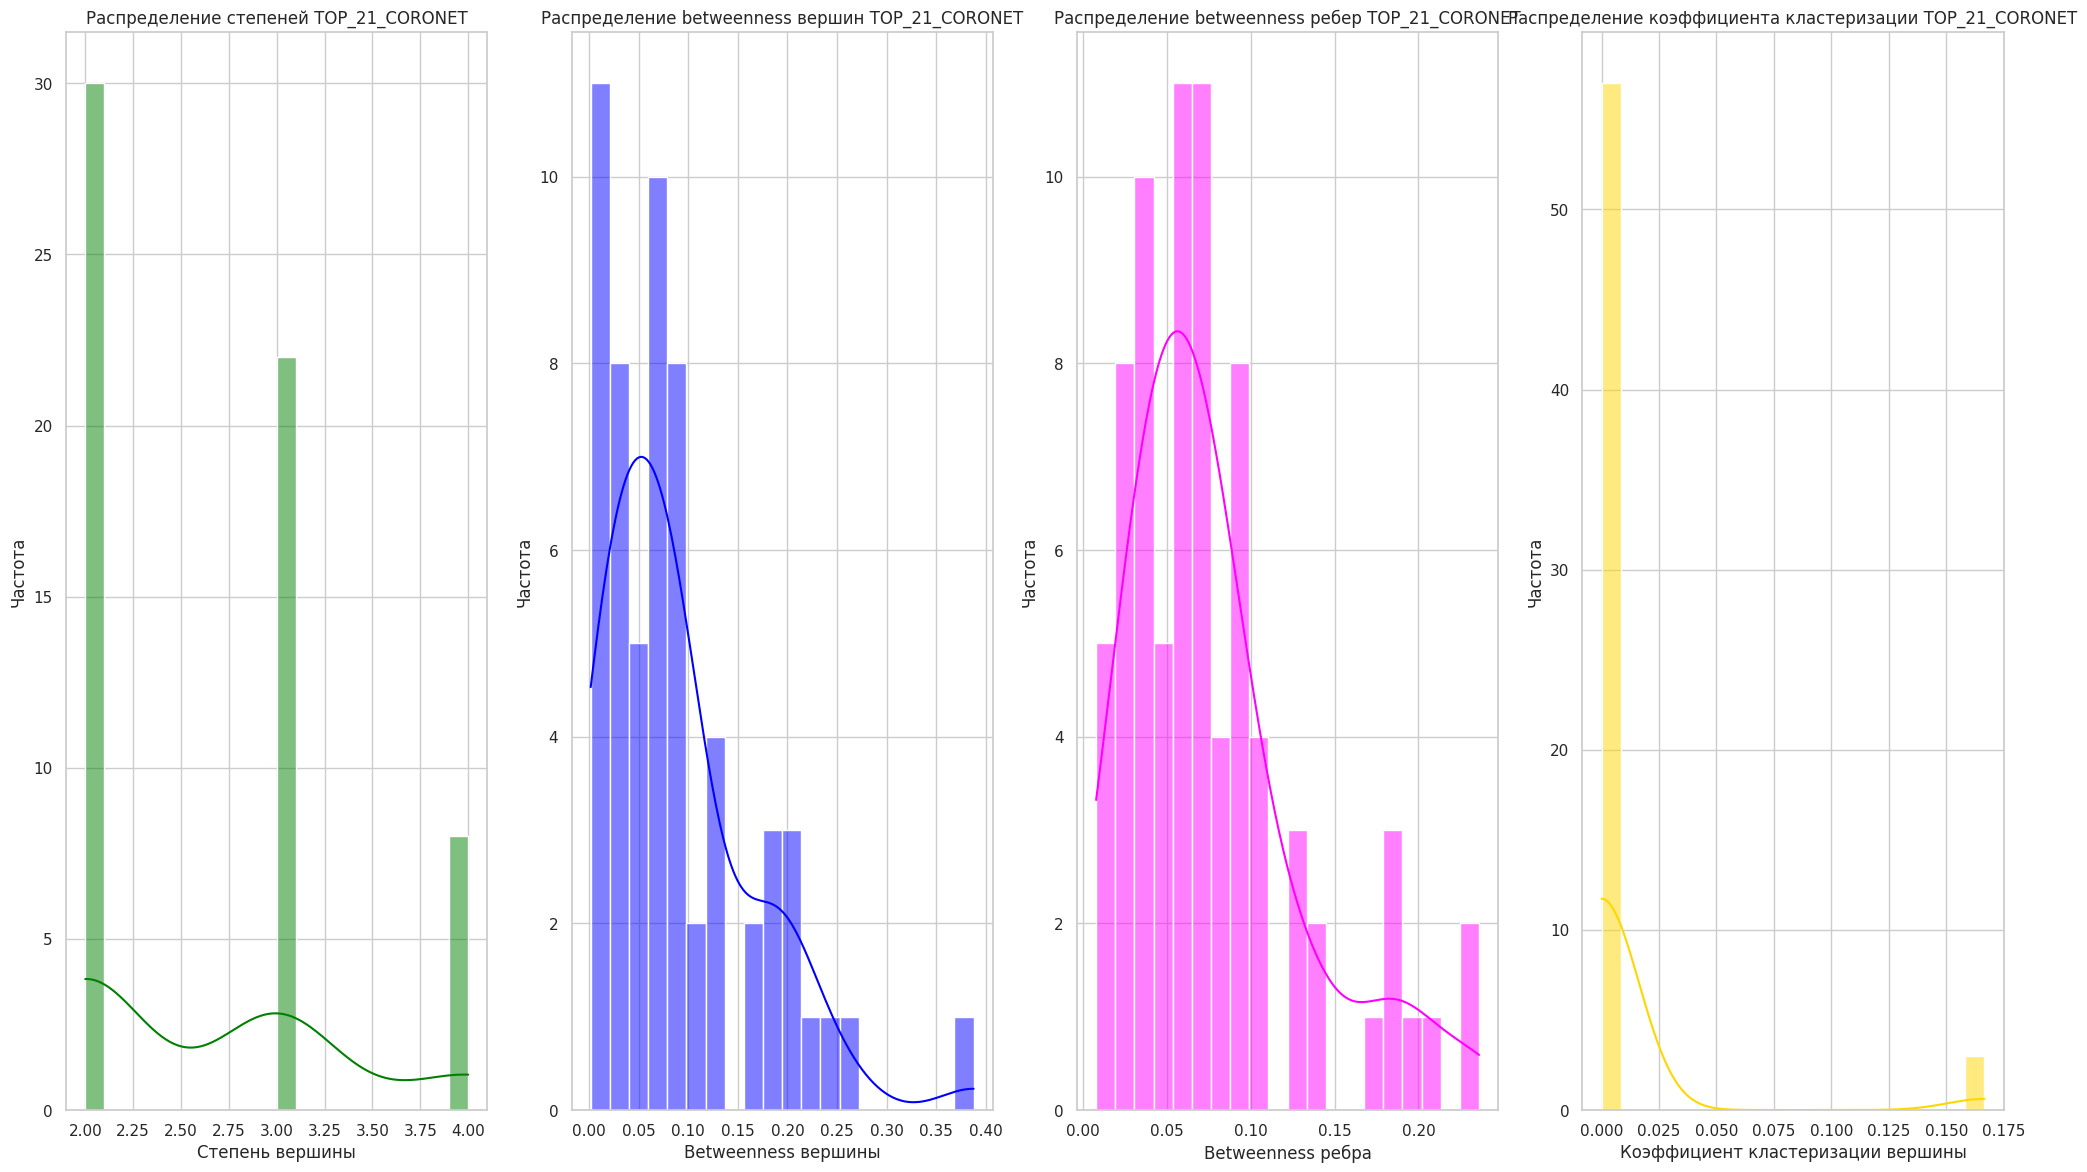

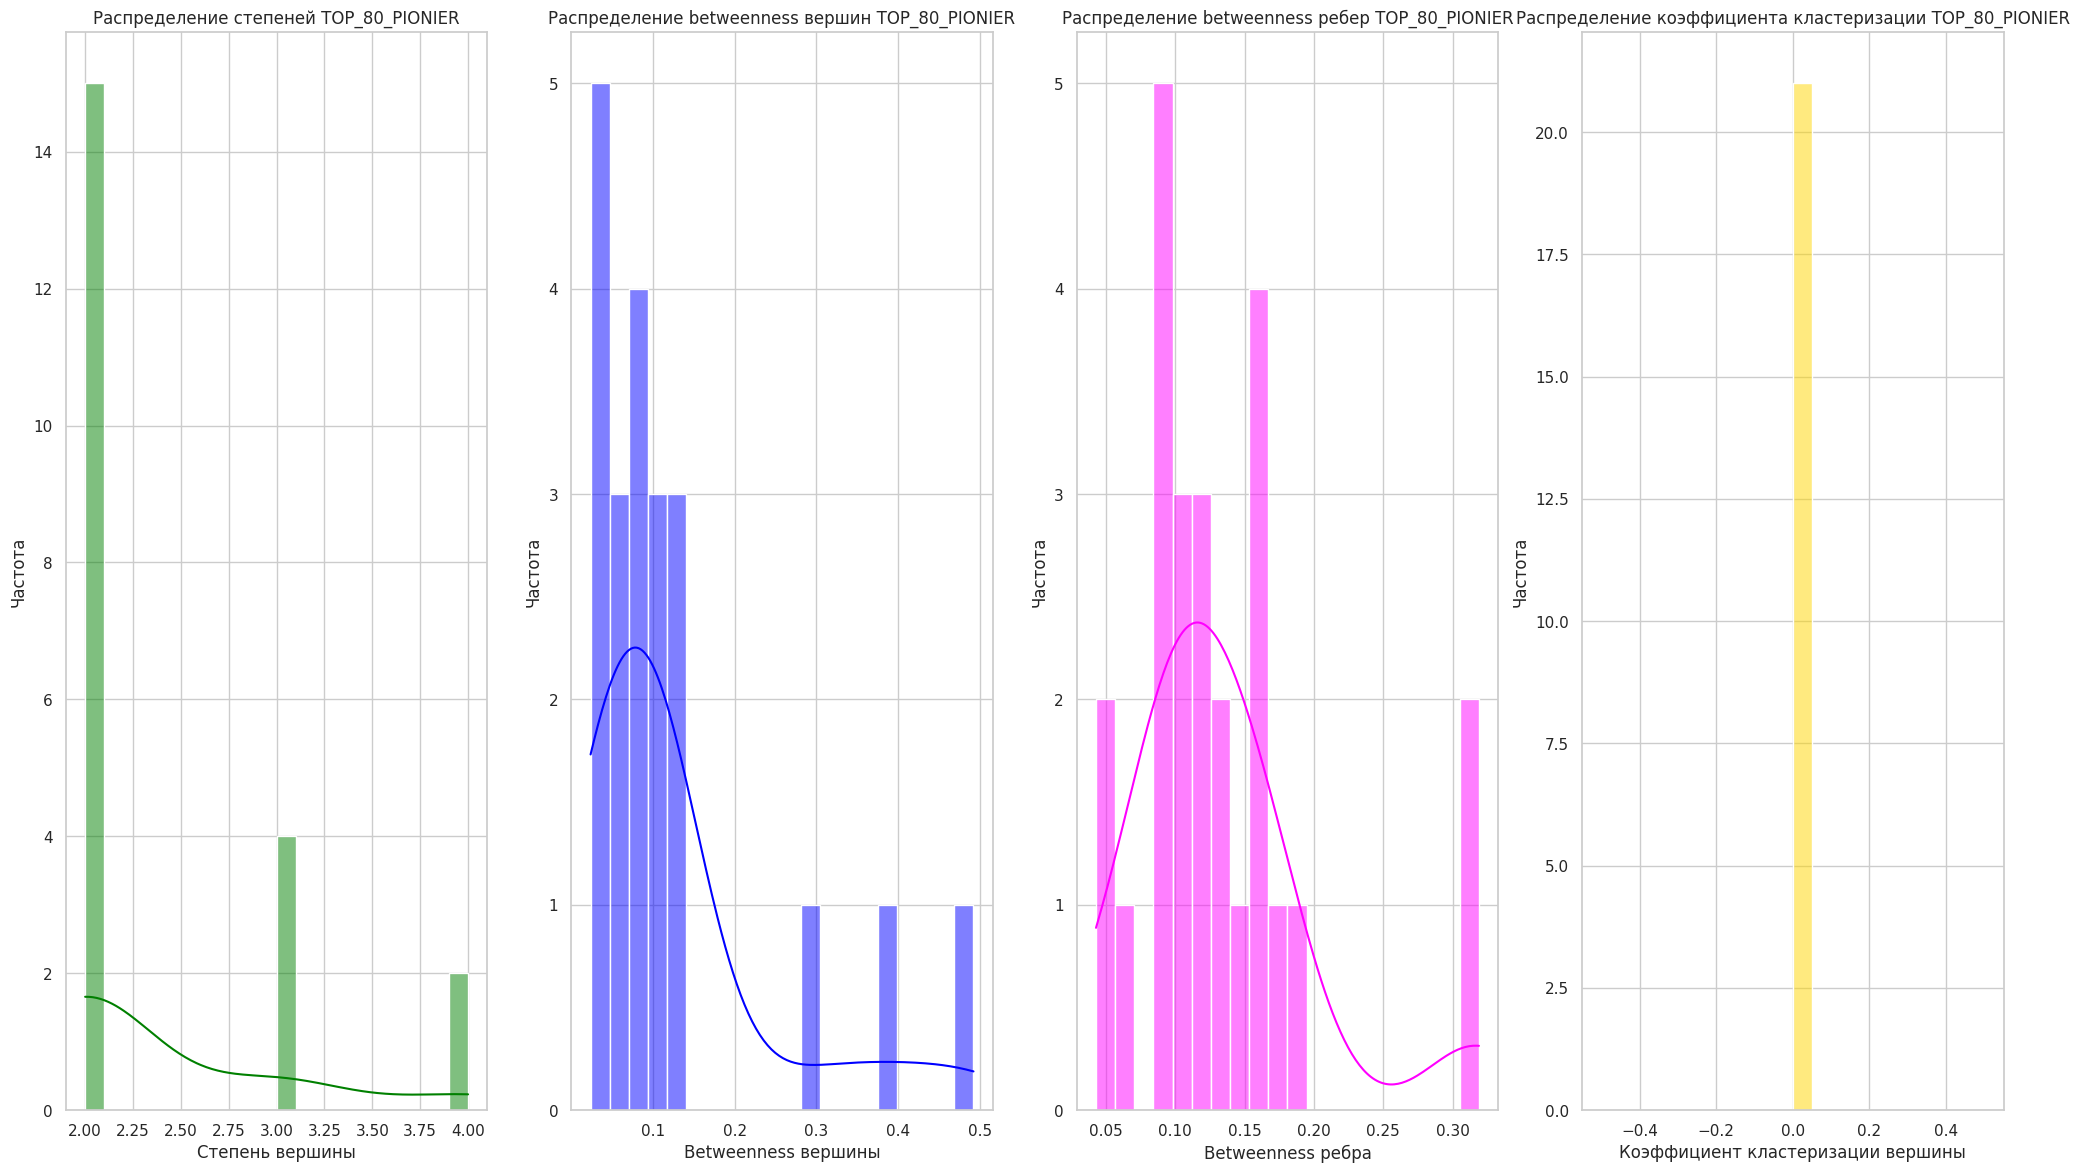

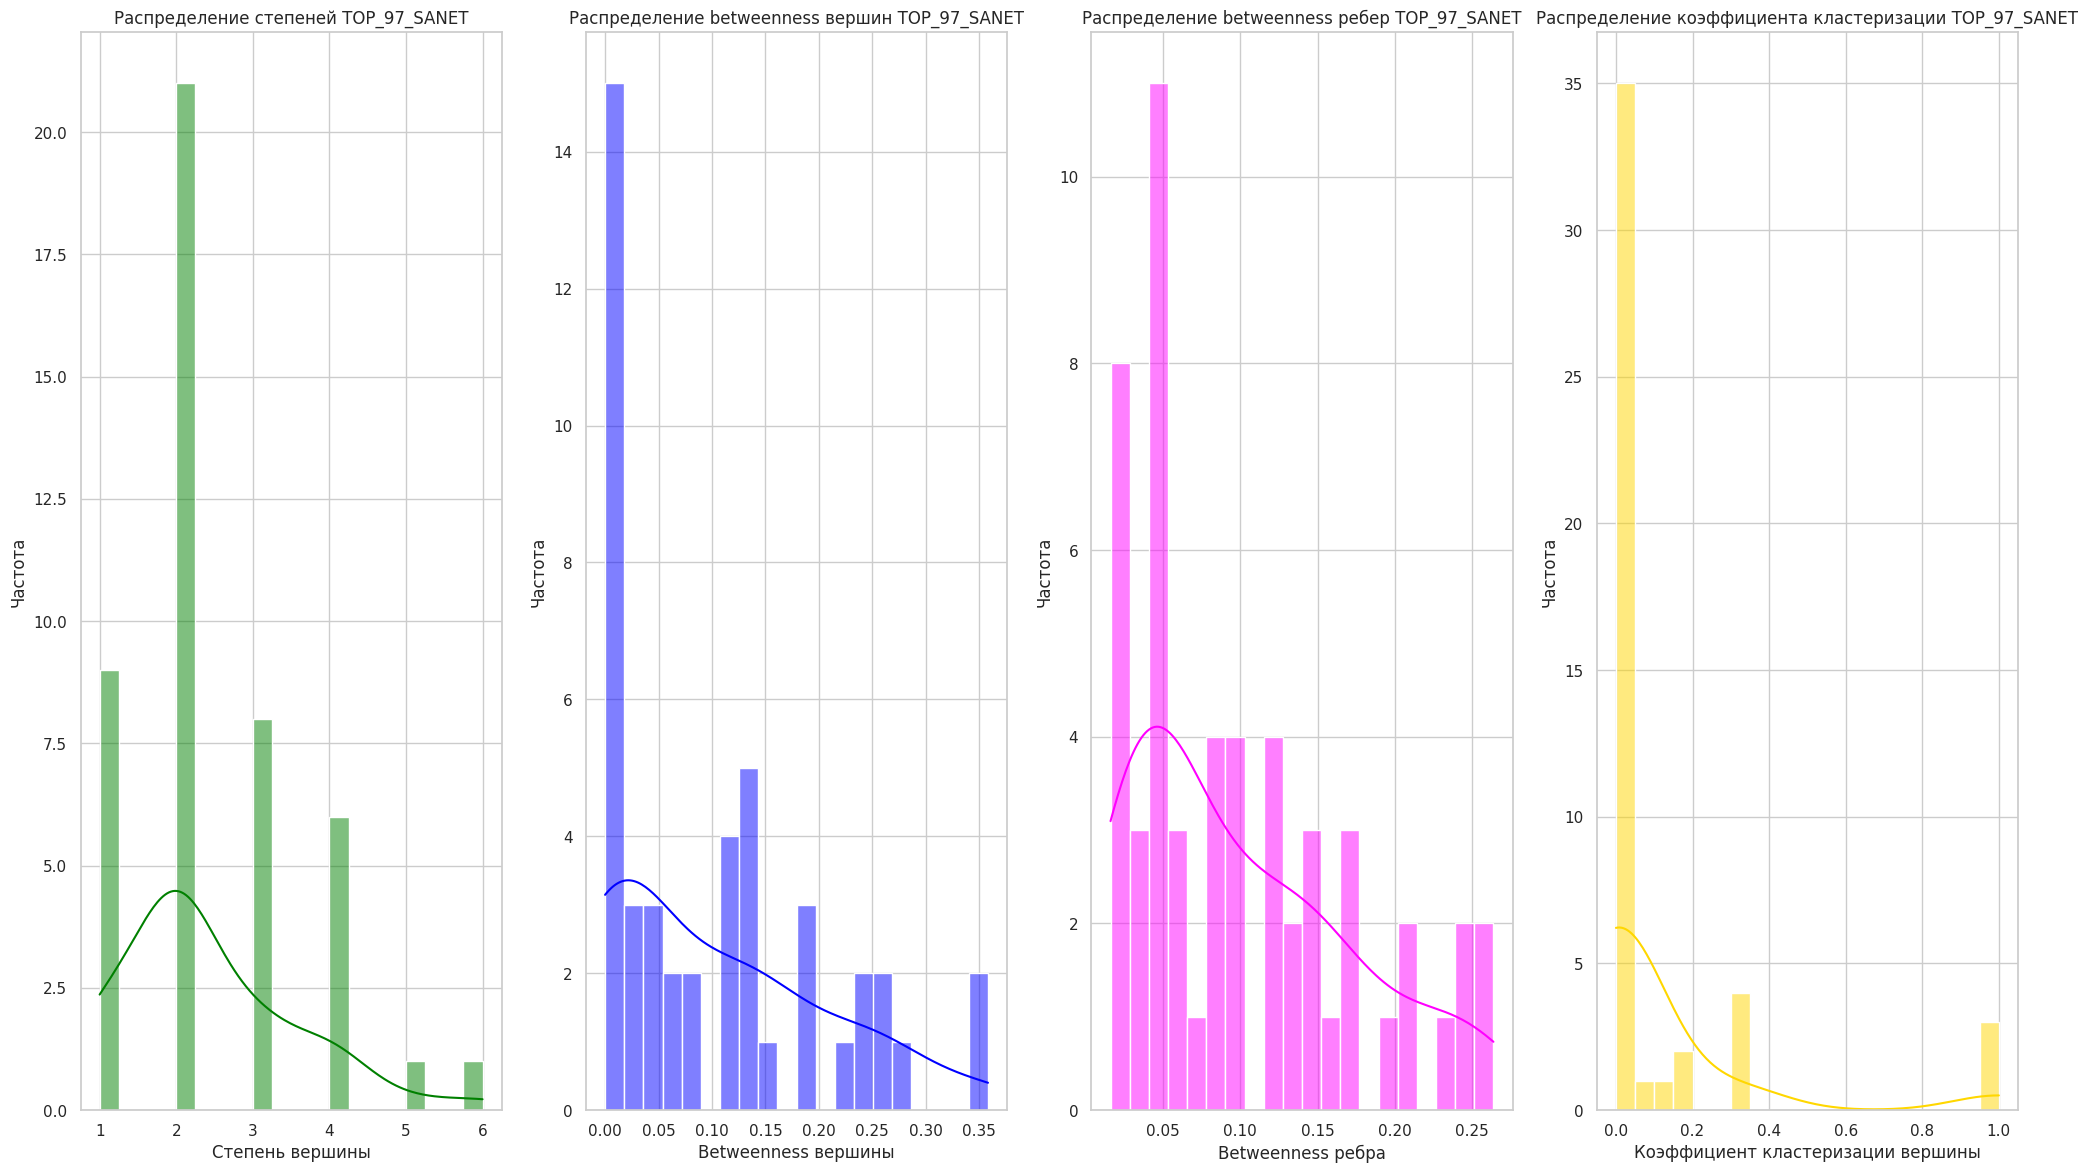

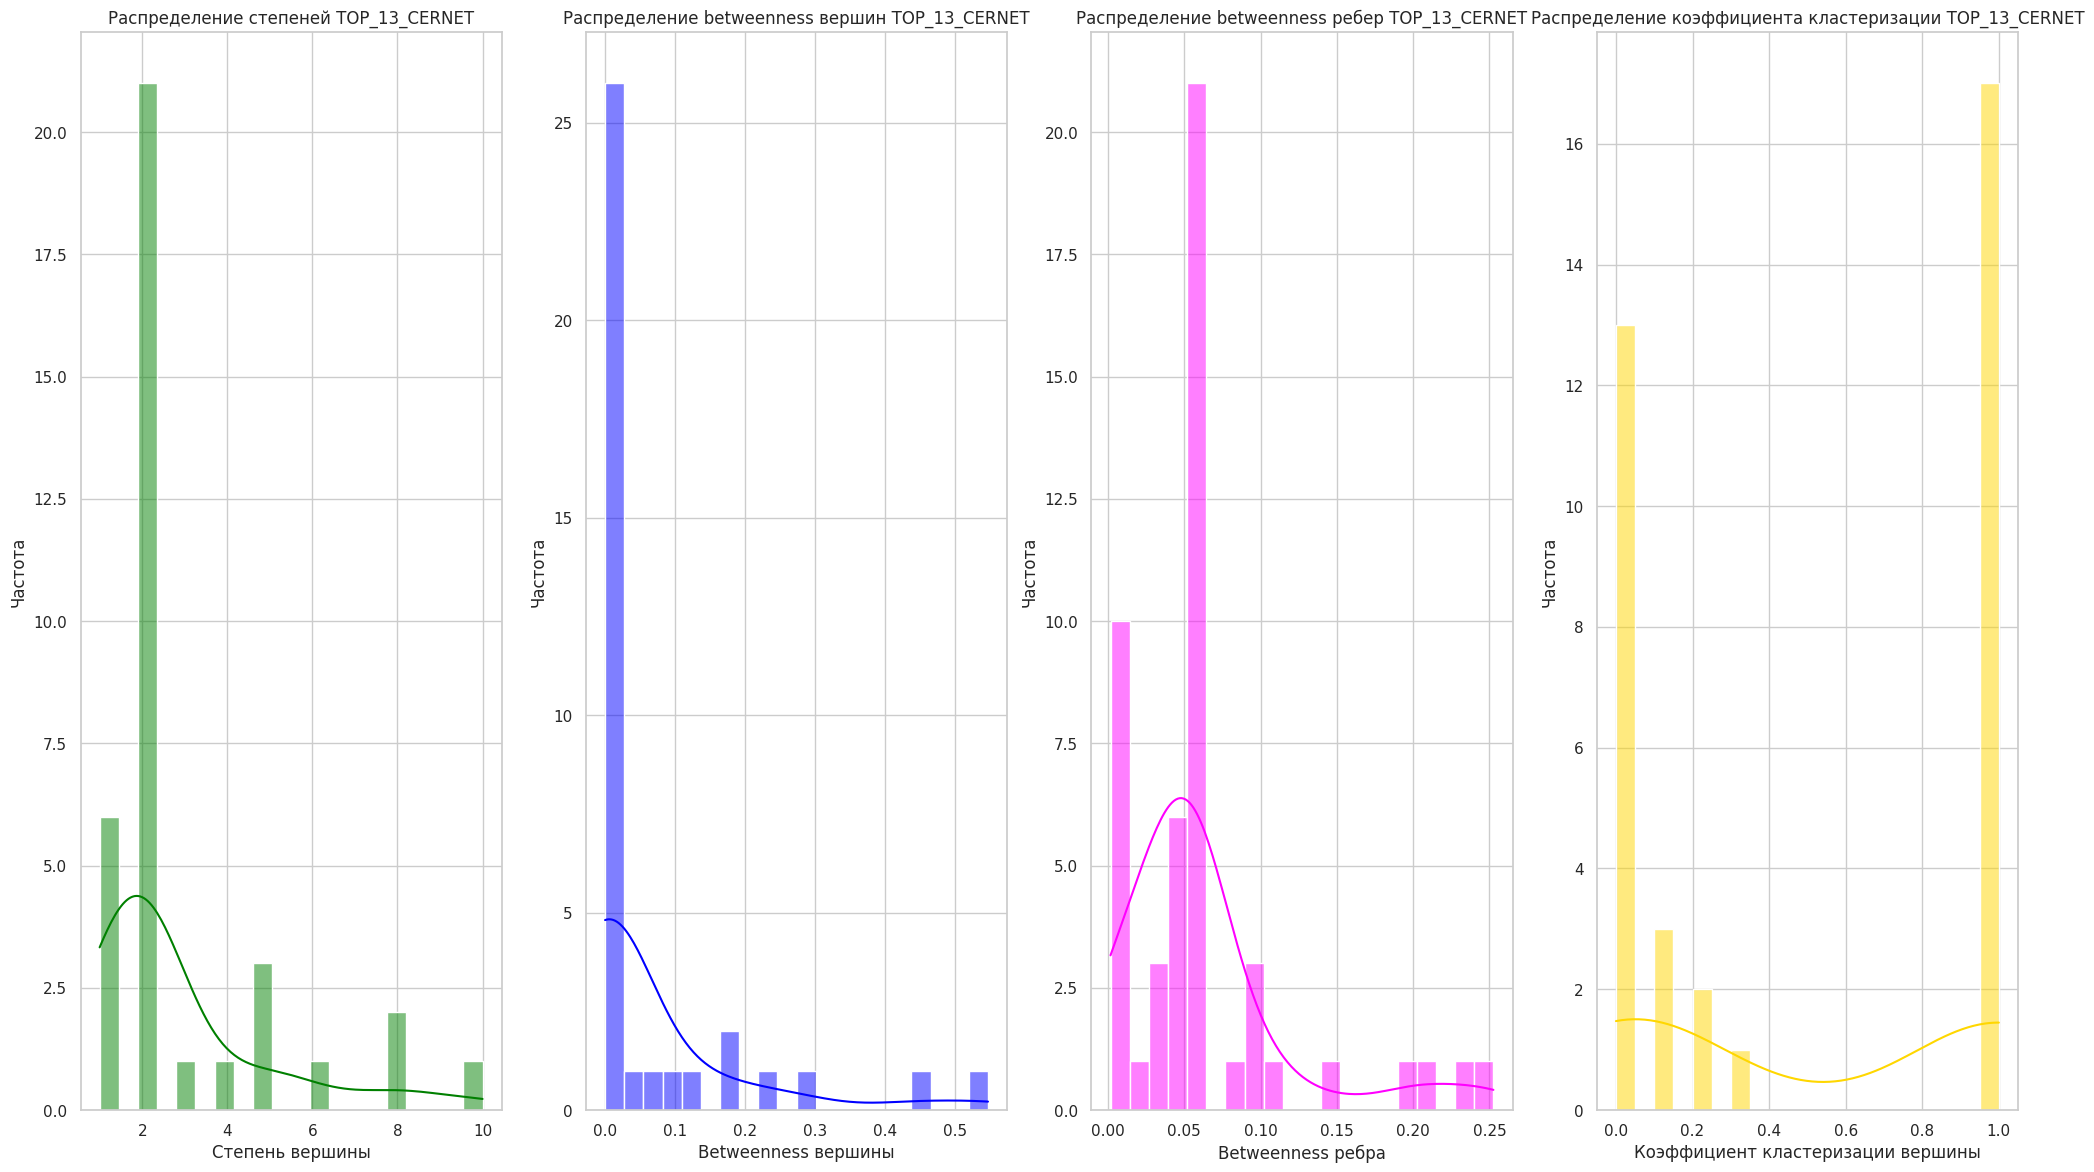

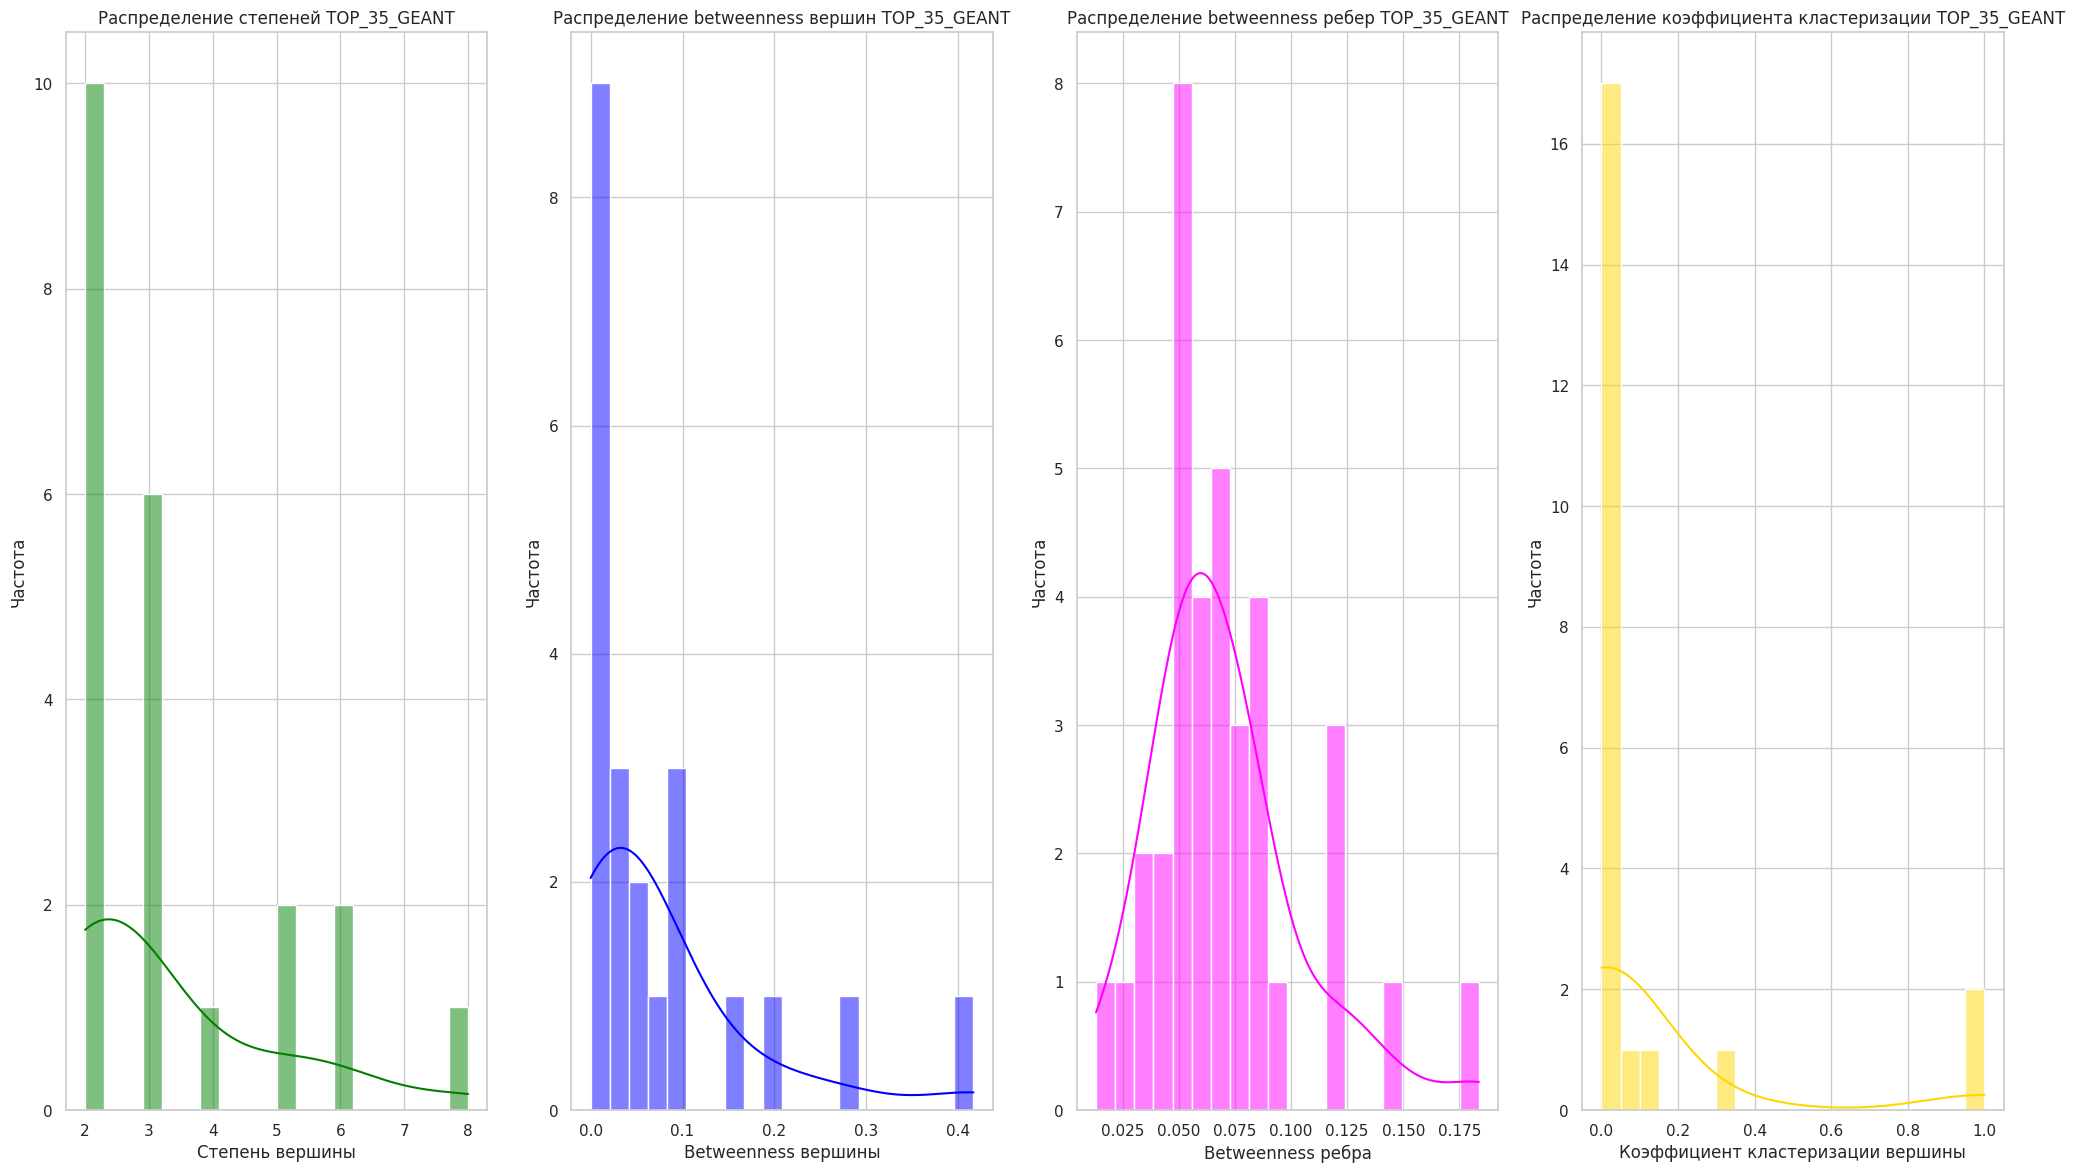

In [26]:
import networkx as netx
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from networkx import *

def excel_to_graph(path):
  df = pd.read_excel(path, sheet_name = 1)

  max_vertex = max(df['Source'].max(), df['Destination'].max())

  adjacency_matrix = np.zeros((max_vertex, max_vertex))

  for index, row in df.iterrows():
    start_vertex = int(row['Source']) - 1
    end_vertex = int(row['Destination']) - 1
    weight = row['Computed Length (km)']
    adjacency_matrix[start_vertex][end_vertex] = weight
    adjacency_matrix[end_vertex][start_vertex] = weight

  return adjacency_matrix

def graph_topology(graph):

  topology = []

  num_nodes = graph.number_of_nodes()
  topology.append(num_nodes)

  num_edges = graph.number_of_edges()
  topology.append(num_edges)

  degrees = graph.degree()
  avg_degree = np.mean(graph.degree(), axis = 0)[1]
  topology.append(avg_degree)

  diameter = netx.diameter(graph)
  topology.append(diameter)

  edge_density = netx.density(graph)
  topology.append(edge_density)

  avg_shortest_path_length = netx.average_shortest_path_length(graph)
  topology.append(avg_shortest_path_length)

  avg_clustering_coefficient = netx.average_clustering(graph)
  topology.append(avg_clustering_coefficient)

  local_clustering = list(netx.clustering(graph).values())
  std_clustering_coefficient = np.std(local_clustering)
  topology.append(std_clustering_coefficient)

  node_betweenness = list(netx.betweenness_centrality(graph).values())
  min_node_betweenness = min(node_betweenness)
  topology.append(min_node_betweenness)
  max_node_betweenness = max(node_betweenness)
  topology.append(max_node_betweenness)
  avg_node_betweenness = sum(node_betweenness) / num_nodes
  topology.append(avg_node_betweenness)

  edge_betweenness = list(netx.edge_betweenness_centrality(graph).values())
  min_edge_betweenness = min(edge_betweenness)
  topology.append(min_edge_betweenness)
  max_edge_betweenness = max(edge_betweenness)
  topology.append(max_edge_betweenness)
  avg_edge_betweenness = sum(edge_betweenness) / num_edges
  topology.append(avg_edge_betweenness)

  return topology

def graphics_and_distributions(graph, file = None):

  sns.set(style="whitegrid")
  fig, (degree_distribution, node_betweenness_distribution, edge_betweenness_distribution, local_clustering_distribution) = plt.subplots(1, 4, figsize=(25, 14))

  degrees = list(dict(graph.degree()).values())
  sns.histplot(degrees, kde=True, color='green', bins=20, ax=degree_distribution)
  title = 'Распределение степеней ' + file[:-5]
  degree_distribution.set(xlabel='Степень вершины', ylabel='Частота', title=title)

  node_betweenness = list(netx.betweenness_centrality(graph).values())
  sns.histplot(node_betweenness, kde=True, color='blue', bins=20, ax=node_betweenness_distribution)
  title = 'Распределение betweenness вершин ' + file[:-5]
  node_betweenness_distribution.set(xlabel='Betweenness вершины', ylabel='Частота', title=title)

  edge_betweenness = list(netx.edge_betweenness_centrality(graph).values())
  sns.histplot(edge_betweenness, kde=True, color='magenta', bins=20, ax=edge_betweenness_distribution)
  title = 'Распределение betweenness ребер ' + file[:-5]
  edge_betweenness_distribution.set(xlabel='Betweenness ребра', ylabel='Частота', title=title)

  local_clustering = list(netx.clustering(graph).values())
  sns.histplot(local_clustering, kde=True, color='gold', bins=20, ax=local_clustering_distribution)
  title = 'Распределение коэффициента кластеризации ' + file[:-5]
  local_clustering_distribution.set(xlabel='Коэффициент кластеризации вершины', ylabel='Частота', title=title)

  plt.show()

def folder_to_graphs(path_to_folder):
  files = os.listdir(path_to_folder)
  Output = []
  excel_tables = []
  for file in files:
    if file.endswith('.xlsx'):
      excel_file_path = os.path.join(path_to_folder, file)
      excel_tables.append(file[:-5])

      adjacency_matrix = excel_to_graph(excel_file_path)
      graph = netx.from_numpy_array(adjacency_matrix)

      Output.append(graph_topology(graph))

  labels = ['Number of Nodes', 'Number of Edges', 'Average Node Degree', 'Diameter(hops)', 'Edge Density (Physical Connectivity)', 'Average Shortest Path Length (Hops)', 'Average Clustering Coefficient', 'Standard Deviation of Clustering Coefficient', 'Minimum Node Betweenness Centrality', 'Maximum Node Betweenness Centrality', 'Average Node Betweenness Centrality', 'Minimum Edge Betweenness Centrality', 'Maximum Edge Betweenness Centrality', 'Average Edge Betweenness Centrality']
  Table = pd.DataFrame(Output, index = excel_tables ,columns = labels)
  return Table

def folder_to_graphics(path_to_folder):
  files = os.listdir(path_to_folder)
  Output = []
  excel_tables = []
  for file in files:
    if file.endswith('.xlsx'):
      excel_file_path = os.path.join(path_to_folder, file)
      excel_tables.append(file[:-5])

      adjacency_matrix = excel_to_graph(excel_file_path)
      graph = netx.from_numpy_array(adjacency_matrix)
      graphics_and_distributions(graph, file)

path_to_folder = '/content/Тест'
folder_to_graphics(path_to_folder)